In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow.keras import layers
import seaborn as sns
import pickle
import zipfile
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Udemy/TensorFlow/traffic-signs-data.zip'

zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall("./")
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/Udemy/TensorFlow/traffic-signs-data.zip' mode='r'>>

In [5]:
with open('./traffic-signs-data/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)

with open('./traffic-signs-data/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)

with open('./traffic-signs-data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

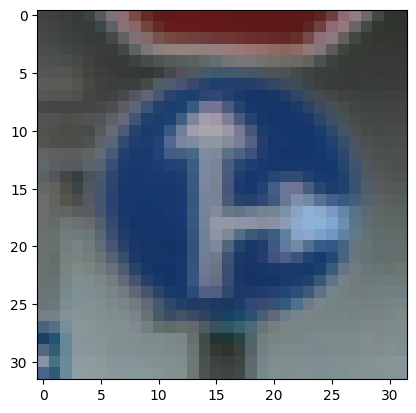

In [7]:
plt.imshow(X_train[1100])

# Data visualization

In [8]:
X_train.shape

(34799, 32, 32, 3)

In [9]:
X_test.shape

(12630, 32, 32, 3)

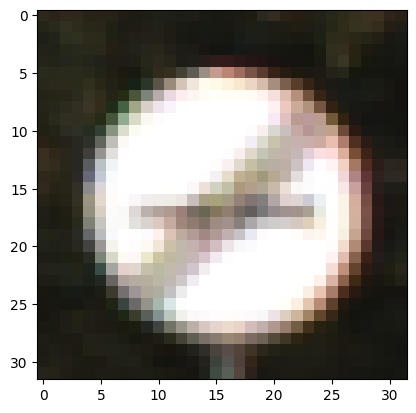

In [12]:
i = random.randint(1, 34000)
plt.imshow(X_train[i], cmap='gray')

In [13]:
label = y_train[i]
label

41

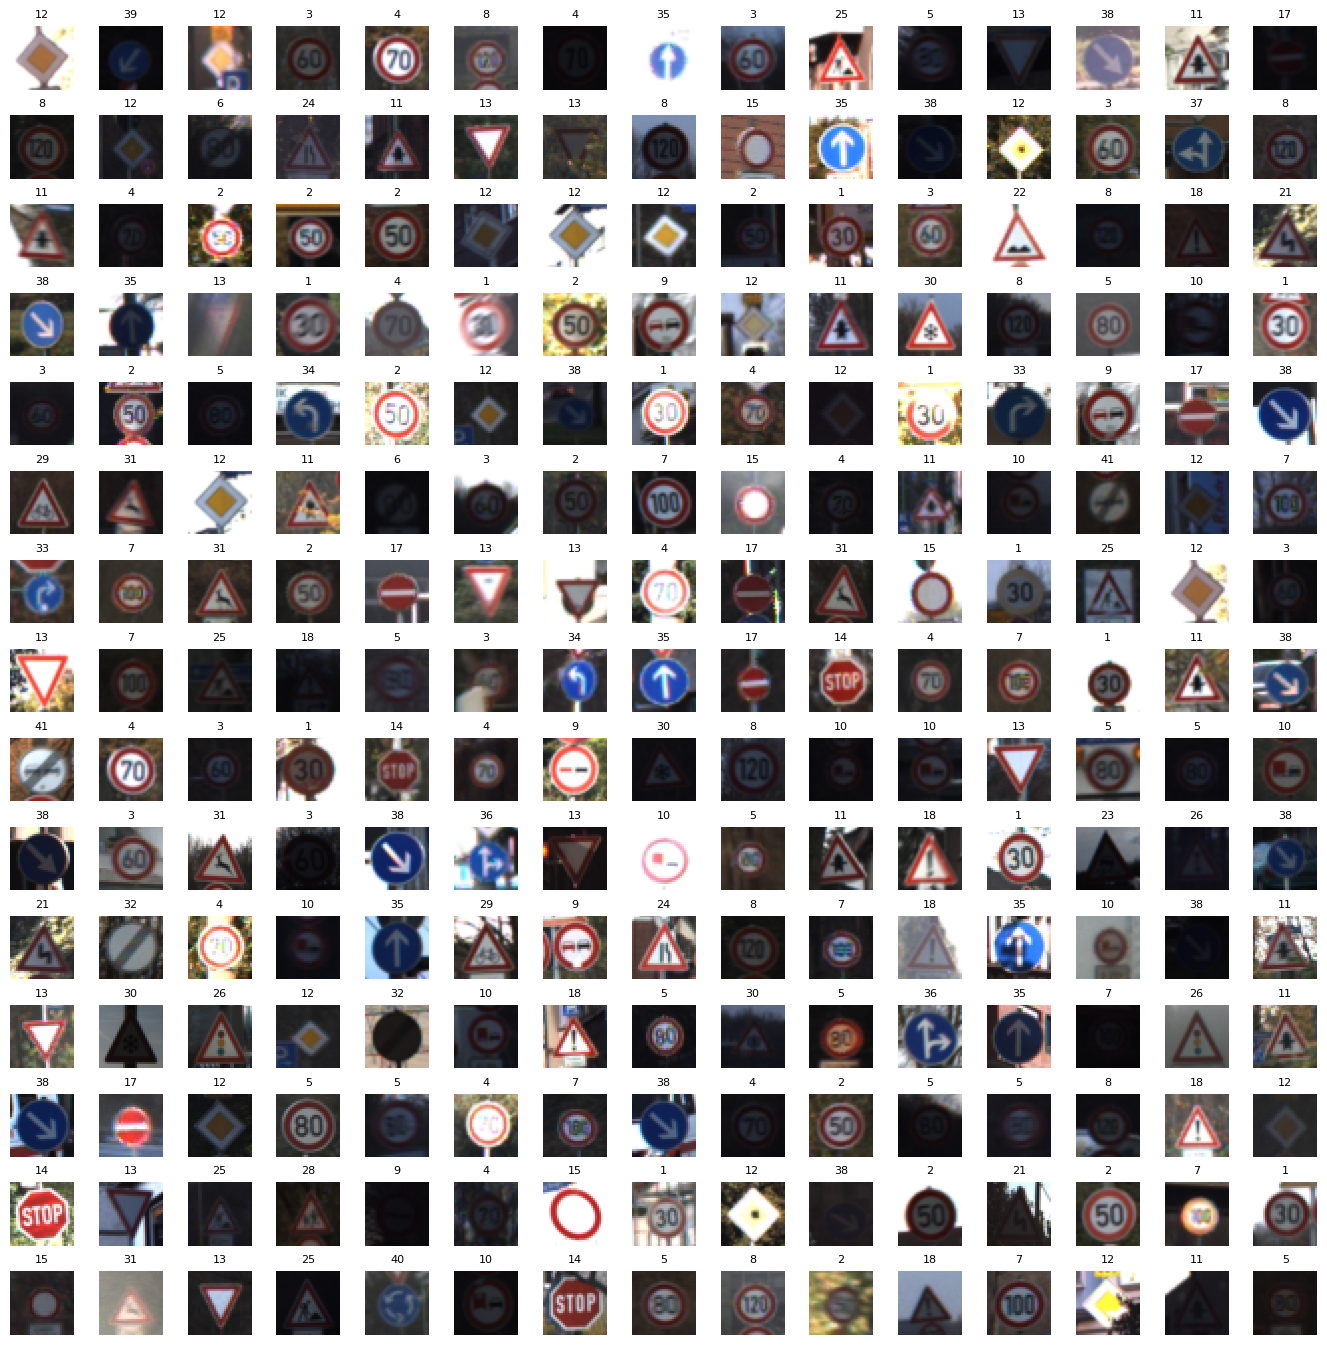

In [14]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, L_grid,figsize=(17, 17))

axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Data processing

In [15]:
X_train = X_train/255
X_test = X_test/255

# Set autoencoder

In [21]:
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))

# Encoded image (Code Layer)
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

# Decoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [22]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 average_pooling2d_3 (Avera  (None, 16, 16, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_7 (Bat  (None, 16, 16, 32)       

In [23]:
autoencoder.fit(X_train,
          X_train,
          epochs=20,
          batch_size=200,
          validation_data=(X_test, X_test))

Epoch 1/20
174/174 [==============================] - 270s 2s/step - loss: 0.5075 - val_loss: 0.5817
Epoch 2/20
174/174 [==============================] - 297s 2s/step - loss: 0.4877 - val_loss: 0.5340
Epoch 3/20
174/174 [==============================] - 288s 2s/step - loss: 0.4838 - val_loss: 0.4941
Epoch 4/20
174/174 [==============================] - 292s 2s/step - loss: 0.4816 - val_loss: 0.4798
Epoch 5/20
174/174 [==============================] - 291s 2s/step - loss: 0.4797 - val_loss: 0.4772
Epoch 6/20
174/174 [==============================] - 291s 2s/step - loss: 0.4784 - val_loss: 0.4766
Epoch 7/20
174/174 [==============================] - 268s 2s/step - loss: 0.4776 - val_loss: 0.4748
Epoch 8/20
174/174 [==============================] - 264s 2s/step - loss: 0.4762 - val_loss: 0.4737
Epoch 9/20
174/174 [==============================] - 284s 2s/step - loss: 0.4755 - val_loss: 0.4737
Epoch 10/20
174/174 [==============================] - 267s 2s/step - loss: 0.4749 - val_lo

In [24]:
predicted = autoencoder.predict(X_test[:10].reshape(-1,32,32,3))

1/1 [==============================] - 0s 313ms/step


In [25]:
predicted.shape

(10, 32, 32, 3)

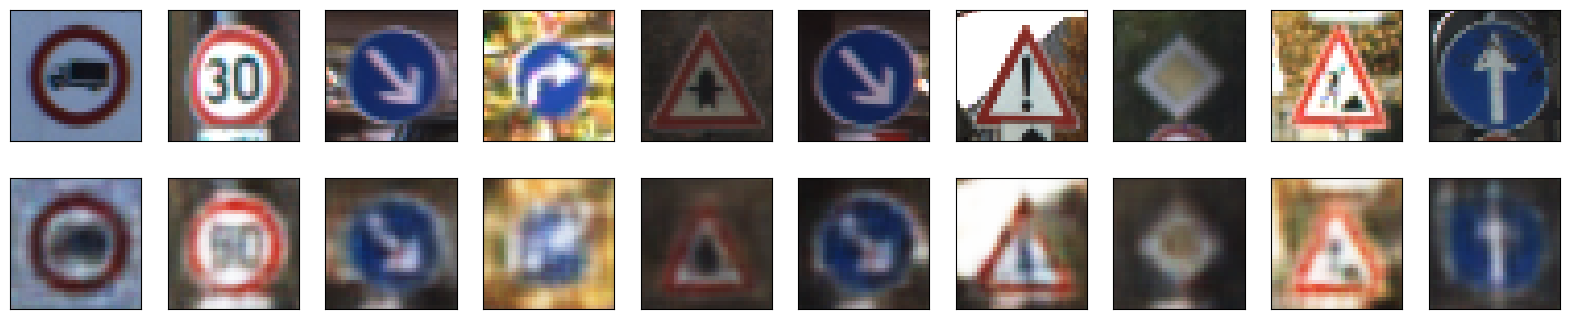

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4), sharex=True, sharey=True)

for images, rows in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, rows):
        ax.imshow(img.reshape((32, 32, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)